In [40]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt

In [50]:
originalDF = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
# to easily compare imputed vs non-imputed results

In [2]:
zillow = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [3]:
zipcodes = zillow['RegionName'].astype(str)
zipcodes = ['0'+x if len(x) == 4 else x for x in zipcodes]
zillow['zipcodes'] = zipcodes
zillow = zillow.drop('RegionName',axis=1)
zillow['State'] = [x.split(", ")[1] for x in zillow['MsaName']]
zillow['City'] = [x.split(", ")[0] for x in zillow['MsaName']]
zillow = zillow.drop('MsaName',1)
zillow.head()

,RegionID,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,zipcodes,State,City
0,61639,1,3062.0,3076.0,3089.0,3102.0,3115.0,3129.0,3142.0,3155.0,3169.0,3182.0,3195.0,3208.0,3221.0,3231.0,3241.0,3251.0,3257.0,3262.0,3268.0,3272.0,3277.0,3281.0,3285.0,3288.0,3292.0,3294.0,3296.0,3298.0,3300.0,3301.0,3303.0,3302.0,3300.0,3299.0,3299.0,3299.0,3299.0,3301.0,3302.0,3304.0,3302.0,3301.0,3299.0,3297.0,3295.0,3292.0,3291.0,3290.0,3289.0,3289.0,3290.0,3290.0,3292.0,3295.0,3297.0,3301.0,3305.0,3308.0,3313.0,3317.0,3322.0,3329.0,3336.0,3343.0,3353.0,3363.0,3373.0,3381.0,3389.0,3398.0,3390.0,3382.0,3374.0,3342.0,3309.0,3277.0,3232.0,3188.0,3144.0,3098.0,3052.0,3006.0,2958.0,2910.0,2861.0,10025,NY,New York
1,84654,2,1544.0,1550.0,1555.0,1561.0,1566.0,1571.0,1576.0,1581.0,1587.0,1592.0,1597.0,1602.0,1607.0,1612.0,1616.0,1621.0,1625.0,1629.0,1634.0,1638.0,1643.0,1648.0,1653.0,1658.0,1662.0,1667.0,1672.0,1676.0,1681.0,1685.0,1689.0,1693.0,1697.0,1701.0,1704.0,1707.0,1710.0,1711.0,1713.0,1715.0,1716.0,1717.0,1719.0,1720.0,1721.0,1723.0,1724.0,1726.0,1727.0,1727.0,1728.0,1728.0,1728.0,1729.0,1729.0,1730.0,1731.0,1733.0,1736.0,1738.0,1741.0,1746.0,1751.0,1756.0,1762.0,1768.0,1775.0,1780.0,1785.0,1789.0,1790.0,1791.0,1791.0,1787.0,1783.0,1778.0,1771.0,1765.0,1758.0,1751.0,1743.0,1736.0,1728.0,1721.0,1713.0,60657,IL,Chicago
2,61637,3,3104.0,3114.0,3124.0,3133.0,3142.0,3151.0,3160.0,3169.0,3177.0,3186.0,3192.0,3197.0,3203.0,3208.0,3212.0,3217.0,3222.0,3228.0,3233.0,3239.0,3245.0,3250.0,3255.0,3260.0,3264.0,3264.0,3264.0,3264.0,3260.0,3257.0,3253.0,3250.0,3248.0,3245.0,3246.0,3247.0,3247.0,3249.0,3251.0,3253.0,3254.0,3254.0,3255.0,3254.0,3254.0,3253.0,3251.0,3250.0,3249.0,3250.0,3251.0,3252.0,3256.0,3260.0,3263.0,3267.0,3271.0,3275.0,3280.0,3284.0,3289.0,3295.0,3301.0,3308.0,3315.0,3323.0,3331.0,3336.0,3342.0,3347.0,3339.0,3331.0,3323.0,3293.0,3263.0,3233.0,3190.0,3148.0,3106.0,3061.0,3017.0,2973.0,2927.0,2880.0,2834.0,10023,NY,New York
3,91982,4,1738.0,1741.0,1744.0,1748.0,1751.0,1754.0,1757.0,1759.0,1762.0,1765.0,1767.0,1769.0,1771.0,1771.0,1771.0,1771.0,1769.0,1768.0,1766.0,1763.0,1759.0,1756.0,1751.0,1747.0,1742.0,1736.0,1730.0,1724.0,1718.0,1712.0,1705.0,1701.0,1697.0,1693.0,1690.0,1688.0,1685.0,1685.0,1685.0,1685.0,1688.0,1691.0,1694.0,1698.0,1702.0,1707.0,1710.0,1714.0,1717.0,1719.0,1721.0,1723.0,1724.0,1724.0,1725.0,1725.0,1726.0,1726.0,1728.0,1729.0,1731.0,1734.0,1736.0,1738.0,1741.0,1743.0,1745.0,1747.0,1748.0,1750.0,1751.0,1752.0,1753.0,1755.0,1757.0,1759.0,1763.0,1767.0,1770.0,1774.0,1778.0,1782.0,1786.0,1790.0,1794.0,77494,TX,Houston
4,84616,5,1702.0,1707.0,1712.0,1717.0,1721.0,1726.0,1731.0,1735.0,1739.0,1743.0,1748.0,1753.0,1757.0,1762.0,1767.0,1772.0,1778.0,1784.0,1790.0,1798.0,1806.0,1814.0,1821.0,1829.0,1836.0,1841.0,1847.0,1852.0,1856.0,1859.0,1863.0,1866.0,1869.0,1871.0,1873.0,1875.0,1877.0,1879.0,1880.0,1881.0,1884.0,1887.0,1890.0,1893.0,1897.0,1900.0,1903.0,1905.0,1907.0,1909.0,1910.0,1912.0,1913.0,1914.0,1915.0,1918.0,1920.0,1923.0,1926.0,1930.0,1933.0,1939.0,1945.0,1950.0,1957.0,1964.0,1970.0,1975.0,1979.0,1984.0,1985.0,1987.0,1988.0,1982.0,1976.0,1970.0,1958.0,1945.0,1932.0,1919.0,1906.0,1892.0,1878.0,1863.0,1849.0,60614,IL,Chicago


In [5]:
monthly_increase = np.mean(zillow.iloc[:,2:87].diff(axis=1))
monthly_increase = round(monthly_increase, 2)

In [6]:
zillow['2014-01'].fillna(zillow['2014-02']-monthly_increase['2014-02'], inplace=True)

zillow['2014-02'].fillna(zillow['2014-03']-monthly_increase['2014-03'], inplace=True)

zillow['2014-03'].fillna(zillow['2014-04']-monthly_increase['2014-04'], inplace=True)
zillow['2014-04'].fillna(zillow['2014-05']-monthly_increase['2014-05'], inplace=True)
zillow['2014-05'].fillna(zillow['2014-06']-monthly_increase['2014-06'], inplace=True)
zillow['2014-06'].fillna(zillow['2014-07']-monthly_increase['2014-07'], inplace=True)
zillow['2014-07'].fillna(zillow['2014-08']-monthly_increase['2014-08'], inplace=True)
zillow['2014-08'].fillna(zillow['2014-09']-monthly_increase['2014-09'], inplace=True)
zillow['2014-09'].fillna(zillow['2014-10']-monthly_increase['2014-10'], inplace=True)
zillow['2014-10'].fillna(zillow['2014-11']-monthly_increase['2014-11'], inplace=True)
zillow['2014-11'].fillna(zillow['2014-12']-monthly_increase['2014-12'], inplace=True)

zillow['2014-12'].fillna(zillow['2015-01']-monthly_increase['2015-01'], inplace=True)
zillow['2015-01'].fillna(zillow['2015-02']-monthly_increase['2015-02'], inplace=True)
zillow['2015-02'].fillna(zillow['2015-03']-monthly_increase['2015-03'], inplace=True)
zillow['2015-03'].fillna(zillow['2015-04']-monthly_increase['2015-04'], inplace=True)
zillow['2015-04'].fillna(zillow['2015-05']-monthly_increase['2015-05'], inplace=True)
zillow['2015-05'].fillna(zillow['2015-06']-monthly_increase['2015-06'], inplace=True)
zillow['2015-06'].fillna(zillow['2015-07']-monthly_increase['2015-07'], inplace=True)
zillow['2015-07'].fillna(zillow['2015-08']-monthly_increase['2015-08'], inplace=True)
zillow['2015-08'].fillna(zillow['2015-09']-monthly_increase['2015-09'], inplace=True)
zillow['2015-09'].fillna(zillow['2015-10']-monthly_increase['2015-10'], inplace=True)
zillow['2015-10'].fillna(zillow['2015-11']-monthly_increase['2015-11'], inplace=True)
zillow['2015-11'].fillna(zillow['2015-12']-monthly_increase['2015-12'], inplace=True)

zillow['2015-12'].fillna(zillow['2016-01']-monthly_increase['2016-01'], inplace=True)
zillow['2016-01'].fillna(zillow['2016-02']-monthly_increase['2016-02'], inplace=True)
zillow['2016-02'].fillna(zillow['2016-03']-monthly_increase['2016-03'], inplace=True)
zillow['2016-03'].fillna(zillow['2016-04']-monthly_increase['2016-04'], inplace=True)
zillow['2016-04'].fillna(zillow['2016-05']-monthly_increase['2016-05'], inplace=True)
zillow['2016-05'].fillna(zillow['2016-06']-monthly_increase['2016-06'], inplace=True)
zillow['2016-06'].fillna(zillow['2016-07']-monthly_increase['2016-07'], inplace=True)
zillow['2016-07'].fillna(zillow['2016-08']-monthly_increase['2016-08'], inplace=True)
zillow['2016-08'].fillna(zillow['2016-09']-monthly_increase['2016-09'], inplace=True)
zillow['2016-09'].fillna(zillow['2016-10']-monthly_increase['2016-10'], inplace=True)
zillow['2016-10'].fillna(zillow['2016-11']-monthly_increase['2016-11'], inplace=True)
zillow['2016-11'].fillna(zillow['2016-12']-monthly_increase['2016-12'], inplace=True)

zillow['2016-12'].fillna(zillow['2017-01']-monthly_increase['2017-01'], inplace=True)
zillow['2017-01'].fillna(zillow['2017-02']-monthly_increase['2017-02'], inplace=True)
zillow['2017-02'].fillna(zillow['2017-03']-monthly_increase['2017-03'], inplace=True)
zillow['2017-03'].fillna(zillow['2017-04']-monthly_increase['2017-04'], inplace=True)
zillow['2017-04'].fillna(zillow['2017-05']-monthly_increase['2017-05'], inplace=True)
zillow['2017-05'].fillna(zillow['2017-06']-monthly_increase['2017-06'], inplace=True)
zillow['2017-06'].fillna(zillow['2017-07']-monthly_increase['2017-07'], inplace=True)
zillow['2017-07'].fillna(zillow['2017-08']-monthly_increase['2017-08'], inplace=True)
zillow['2017-08'].fillna(zillow['2017-09']-monthly_increase['2017-09'], inplace=True)
zillow['2017-09'].fillna(zillow['2017-10']-monthly_increase['2017-10'], inplace=True)
zillow['2017-10'].fillna(zillow['2017-11']-monthly_increase['2017-11'], inplace=True)
zillow['2017-11'].fillna(zillow['2017-12']-monthly_increase['2017-12'], inplace=True)

zillow['2017-12'].fillna(zillow['2018-01']-monthly_increase['2018-01'], inplace=True)
zillow['2018-01'].fillna(zillow['2018-02']-monthly_increase['2018-02'], inplace=True)
zillow['2018-02'].fillna(zillow['2018-03']-monthly_increase['2018-03'], inplace=True)
zillow['2018-03'].fillna(zillow['2018-04']-monthly_increase['2018-04'], inplace=True)
zillow['2018-04'].fillna(zillow['2018-05']-monthly_increase['2018-05'], inplace=True)
zillow['2018-05'].fillna(zillow['2018-06']-monthly_increase['2018-06'], inplace=True)
zillow['2018-06'].fillna(zillow['2018-07']-monthly_increase['2018-07'], inplace=True)
zillow['2018-07'].fillna(zillow['2018-08']-monthly_increase['2018-08'], inplace=True)
zillow['2018-08'].fillna(zillow['2018-09']-monthly_increase['2018-09'], inplace=True)
zillow['2018-09'].fillna(zillow['2018-10']-monthly_increase['2018-10'], inplace=True)
zillow['2018-10'].fillna(zillow['2018-11']-monthly_increase['2018-11'], inplace=True)
zillow['2018-11'].fillna(zillow['2018-12']-monthly_increase['2018-12'], inplace=True)

zillow['2018-12'].fillna(zillow['2019-01']-monthly_increase['2019-01'], inplace=True)
zillow['2019-01'].fillna(zillow['2019-02']-monthly_increase['2019-02'], inplace=True)
zillow['2019-02'].fillna(zillow['2019-03']-monthly_increase['2019-03'], inplace=True)
zillow['2019-03'].fillna(zillow['2019-04']-monthly_increase['2019-04'], inplace=True)
zillow['2019-04'].fillna(zillow['2019-05']-monthly_increase['2019-05'], inplace=True)
zillow['2019-05'].fillna(zillow['2019-06']-monthly_increase['2019-06'], inplace=True)
zillow['2019-06'].fillna(zillow['2019-07']-monthly_increase['2019-07'], inplace=True)
zillow['2019-07'].fillna(zillow['2019-08']-monthly_increase['2019-08'], inplace=True)
zillow['2019-08'].fillna(zillow['2019-09']-monthly_increase['2019-09'], inplace=True)
zillow['2019-09'].fillna(zillow['2019-10']-monthly_increase['2019-10'], inplace=True)
zillow['2019-10'].fillna(zillow['2019-11']-monthly_increase['2019-11'], inplace=True)
zillow['2019-11'].fillna(zillow['2019-12']-monthly_increase['2019-12'], inplace=True)

zillow['2019-12'].fillna(zillow['2020-01']-monthly_increase['2020-01'], inplace=True)
zillow['2020-01'].fillna(zillow['2020-02']-monthly_increase['2020-02'], inplace=True)
zillow['2020-02'].fillna(zillow['2020-03']-monthly_increase['2020-03'], inplace=True)
zillow['2020-03'].fillna(zillow['2020-04']-monthly_increase['2020-04'], inplace=True)
zillow['2020-04'].fillna(zillow['2020-05']-monthly_increase['2020-05'], inplace=True)
zillow['2020-05'].fillna(zillow['2020-06']-monthly_increase['2020-06'], inplace=True)
zillow['2020-06'].fillna(zillow['2020-07']-monthly_increase['2020-07'], inplace=True)
zillow['2020-07'].fillna(zillow['2020-08']-monthly_increase['2020-08'], inplace=True)
zillow['2020-08'].fillna(zillow['2020-09']-monthly_increase['2020-09'], inplace=True)
zillow['2020-09'].fillna(zillow['2020-10']-monthly_increase['2020-10'], inplace=True)
zillow['2020-10'].fillna(zillow['2020-11']-monthly_increase['2020-11'], inplace=True)
zillow['2020-11'].fillna(zillow['2020-12']-monthly_increase['2020-12'], inplace=True)
zillow['2020-12'].fillna(zillow['2021-01']-monthly_increase['2021-01'], inplace=True)
zillow['2021-01'].fillna(zillow['2020-12']+monthly_increase['2021-01'], inplace=True)

In [7]:
# but there are still some missing

zillow['2021-01'].fillna(zillow['2020-12']+monthly_increase['2021-01'], inplace=True)
zillow['2020-12'].fillna(zillow['2020-11']+monthly_increase['2020-12'], inplace=True)
zillow['2020-11'].fillna(zillow['2020-10']+monthly_increase['2020-11'], inplace=True)
zillow['2020-10'].fillna(zillow['2020-09']+monthly_increase['2020-10'], inplace=True)
zillow['2020-09'].fillna(zillow['2020-08']+monthly_increase['2020-09'], inplace=True)
zillow['2020-08'].fillna(zillow['2020-07']+monthly_increase['2020-08'], inplace=True)
zillow['2020-07'].fillna(zillow['2020-06']+monthly_increase['2020-07'], inplace=True)
zillow['2020-06'].fillna(zillow['2020-05']+monthly_increase['2020-06'], inplace=True)
zillow['2020-05'].fillna(zillow['2020-04']+monthly_increase['2020-05'], inplace=True)
zillow['2020-04'].fillna(zillow['2020-03']+monthly_increase['2020-04'], inplace=True)
zillow['2020-03'].fillna(zillow['2020-02']+monthly_increase['2020-03'], inplace=True)
zillow['2020-02'].fillna(zillow['2020-01']+monthly_increase['2020-02'], inplace=True)
zillow['2020-01'].fillna(zillow['2019-12']+monthly_increase['2020-01'], inplace=True)

zillow['2019-12'].fillna(zillow['2019-11']+monthly_increase['2019-12'], inplace=True)
zillow['2019-11'].fillna(zillow['2019-10']+monthly_increase['2019-11'], inplace=True)
zillow['2019-10'].fillna(zillow['2019-09']+monthly_increase['2019-10'], inplace=True)
zillow['2019-09'].fillna(zillow['2019-08']+monthly_increase['2019-09'], inplace=True)
zillow['2019-08'].fillna(zillow['2019-07']+monthly_increase['2019-08'], inplace=True)
zillow['2019-07'].fillna(zillow['2019-06']+monthly_increase['2019-07'], inplace=True)
zillow['2019-06'].fillna(zillow['2019-05']+monthly_increase['2019-06'], inplace=True)
zillow['2019-05'].fillna(zillow['2019-04']+monthly_increase['2019-05'], inplace=True)
zillow['2019-04'].fillna(zillow['2019-03']+monthly_increase['2019-04'], inplace=True)
zillow['2019-03'].fillna(zillow['2019-02']+monthly_increase['2019-03'], inplace=True)
zillow['2019-02'].fillna(zillow['2019-01']+monthly_increase['2019-02'], inplace=True)
zillow['2019-01'].fillna(zillow['2018-12']+monthly_increase['2019-01'], inplace=True)

zillow['2018-12'].fillna(zillow['2018-11']+monthly_increase['2018-12'], inplace=True)
zillow['2018-11'].fillna(zillow['2018-10']+monthly_increase['2018-11'], inplace=True)
zillow['2018-10'].fillna(zillow['2018-09']+monthly_increase['2018-10'], inplace=True)
zillow['2018-09'].fillna(zillow['2018-08']+monthly_increase['2018-09'], inplace=True)
zillow['2018-08'].fillna(zillow['2018-07']+monthly_increase['2018-08'], inplace=True)
zillow['2018-07'].fillna(zillow['2018-06']+monthly_increase['2018-07'], inplace=True)
zillow['2018-06'].fillna(zillow['2018-05']+monthly_increase['2018-06'], inplace=True)
zillow['2018-05'].fillna(zillow['2018-04']+monthly_increase['2018-05'], inplace=True)
zillow['2018-04'].fillna(zillow['2018-03']+monthly_increase['2018-04'], inplace=True)
zillow['2018-03'].fillna(zillow['2018-02']+monthly_increase['2018-03'], inplace=True)
zillow['2018-02'].fillna(zillow['2018-01']+monthly_increase['2018-02'], inplace=True)
zillow['2018-01'].fillna(zillow['2017-12']+monthly_increase['2018-01'], inplace=True)

zillow['2017-12'].fillna(zillow['2017-11']+monthly_increase['2017-12'], inplace=True)
zillow['2017-11'].fillna(zillow['2017-10']+monthly_increase['2017-11'], inplace=True)
zillow['2017-10'].fillna(zillow['2017-09']+monthly_increase['2017-10'], inplace=True)
zillow['2017-09'].fillna(zillow['2017-08']+monthly_increase['2017-09'], inplace=True)
zillow['2017-08'].fillna(zillow['2017-07']+monthly_increase['2017-08'], inplace=True)
zillow['2017-07'].fillna(zillow['2017-06']+monthly_increase['2017-07'], inplace=True)
zillow['2017-06'].fillna(zillow['2017-05']+monthly_increase['2017-06'], inplace=True)
zillow['2017-05'].fillna(zillow['2017-04']+monthly_increase['2017-05'], inplace=True)
zillow['2017-04'].fillna(zillow['2017-03']+monthly_increase['2017-04'], inplace=True)
zillow['2017-03'].fillna(zillow['2017-02']+monthly_increase['2017-03'], inplace=True)
zillow['2017-02'].fillna(zillow['2017-01']+monthly_increase['2017-02'], inplace=True)
zillow['2017-01'].fillna(zillow['2016-12']+monthly_increase['2017-01'], inplace=True)

zillow['2016-12'].fillna(zillow['2016-11']+monthly_increase['2016-12'], inplace=True)
zillow['2016-11'].fillna(zillow['2016-10']+monthly_increase['2016-11'], inplace=True)
zillow['2016-10'].fillna(zillow['2016-09']+monthly_increase['2016-10'], inplace=True)
zillow['2016-09'].fillna(zillow['2016-08']+monthly_increase['2016-09'], inplace=True)
zillow['2016-08'].fillna(zillow['2016-07']+monthly_increase['2016-08'], inplace=True)
zillow['2016-07'].fillna(zillow['2016-06']+monthly_increase['2016-07'], inplace=True)
zillow['2016-06'].fillna(zillow['2016-05']+monthly_increase['2016-06'], inplace=True)
zillow['2016-05'].fillna(zillow['2016-04']+monthly_increase['2016-05'], inplace=True)
zillow['2016-04'].fillna(zillow['2016-03']+monthly_increase['2016-04'], inplace=True)
zillow['2016-03'].fillna(zillow['2016-02']+monthly_increase['2016-03'], inplace=True)
zillow['2016-02'].fillna(zillow['2016-01']+monthly_increase['2016-02'], inplace=True)
zillow['2016-01'].fillna(zillow['2015-12']+monthly_increase['2016-01'], inplace=True)

zillow['2015-12'].fillna(zillow['2015-11']+monthly_increase['2015-12'], inplace=True)
zillow['2015-11'].fillna(zillow['2015-10']+monthly_increase['2015-11'], inplace=True)
zillow['2015-10'].fillna(zillow['2015-09']+monthly_increase['2015-10'], inplace=True)
zillow['2015-09'].fillna(zillow['2015-08']+monthly_increase['2015-09'], inplace=True)
zillow['2015-08'].fillna(zillow['2015-07']+monthly_increase['2015-08'], inplace=True)
zillow['2015-07'].fillna(zillow['2015-06']+monthly_increase['2015-07'], inplace=True)
zillow['2015-06'].fillna(zillow['2015-05']+monthly_increase['2015-06'], inplace=True)
zillow['2015-05'].fillna(zillow['2015-04']+monthly_increase['2015-05'], inplace=True)
zillow['2015-04'].fillna(zillow['2015-03']+monthly_increase['2015-04'], inplace=True)
zillow['2015-03'].fillna(zillow['2015-02']+monthly_increase['2015-03'], inplace=True)
zillow['2015-02'].fillna(zillow['2015-01']+monthly_increase['2015-02'], inplace=True)
zillow['2015-01'].fillna(zillow['2014-12']+monthly_increase['2015-01'], inplace=True)

zillow['2014-12'].fillna(zillow['2014-11']+monthly_increase['2014-12'], inplace=True)
zillow['2014-11'].fillna(zillow['2014-10']+monthly_increase['2014-11'], inplace=True)
zillow['2014-10'].fillna(zillow['2014-09']+monthly_increase['2014-10'], inplace=True)
zillow['2014-09'].fillna(zillow['2014-08']+monthly_increase['2014-09'], inplace=True)
zillow['2014-08'].fillna(zillow['2014-07']+monthly_increase['2014-08'], inplace=True)
zillow['2014-07'].fillna(zillow['2014-06']+monthly_increase['2014-07'], inplace=True)
zillow['2014-06'].fillna(zillow['2014-05']+monthly_increase['2014-06'], inplace=True)
zillow['2014-05'].fillna(zillow['2014-04']+monthly_increase['2014-05'], inplace=True)
zillow['2014-04'].fillna(zillow['2014-03']+monthly_increase['2014-04'], inplace=True)
zillow['2014-03'].fillna(zillow['2014-02']+monthly_increase['2014-03'], inplace=True)
zillow['2014-02'].fillna(zillow['2014-01']+monthly_increase['2014-02'], inplace=True)

zillow['2014-01'].fillna(zillow['2014-02']-monthly_increase['2014-02'], inplace=True)

In [35]:
zillow['2021-01'].fillna(zillow['2020-12']+monthly_increase['2021-01'], inplace=True)
zillow['2020-12'].fillna(zillow['2021-01']-monthly_increase['2021-01'], inplace=True)
zillow['2020-11'].fillna(zillow['2020-12']-monthly_increase['2020-12'], inplace=True)
zillow['2020-10'].fillna(zillow['2020-11']-monthly_increase['2020-11'], inplace=True)
zillow['2020-09'].fillna(zillow['2020-10']-monthly_increase['2020-10'], inplace=True)
zillow['2020-08'].fillna(zillow['2020-09']-monthly_increase['2020-09'], inplace=True)
zillow['2020-07'].fillna(zillow['2020-08']-monthly_increase['2020-08'], inplace=True)
zillow['2020-06'].fillna(zillow['2020-07']-monthly_increase['2020-07'], inplace=True)
zillow['2020-05'].fillna(zillow['2020-06']-monthly_increase['2020-06'], inplace=True)
zillow['2020-04'].fillna(zillow['2020-05']-monthly_increase['2020-05'], inplace=True)
zillow['2020-03'].fillna(zillow['2020-04']-monthly_increase['2020-04'], inplace=True)
zillow['2020-02'].fillna(zillow['2020-03']-monthly_increase['2020-03'], inplace=True)
zillow['2020-01'].fillna(zillow['2020-02']-monthly_increase['2020-02'], inplace=True)

zillow['2019-12'].fillna(zillow['2020-01']-monthly_increase['2020-01'], inplace=True)
zillow['2019-11'].fillna(zillow['2019-12']-monthly_increase['2019-12'], inplace=True)
zillow['2019-10'].fillna(zillow['2019-11']-monthly_increase['2019-11'], inplace=True)
zillow['2019-09'].fillna(zillow['2019-10']-monthly_increase['2019-10'], inplace=True)
zillow['2019-08'].fillna(zillow['2019-09']-monthly_increase['2019-09'], inplace=True)
zillow['2019-07'].fillna(zillow['2019-08']-monthly_increase['2019-08'], inplace=True)
zillow['2019-06'].fillna(zillow['2019-07']-monthly_increase['2019-07'], inplace=True)
zillow['2019-05'].fillna(zillow['2019-06']-monthly_increase['2019-06'], inplace=True)
zillow['2019-04'].fillna(zillow['2019-05']-monthly_increase['2019-05'], inplace=True)
zillow['2019-03'].fillna(zillow['2019-04']-monthly_increase['2019-04'], inplace=True)
zillow['2019-02'].fillna(zillow['2019-03']-monthly_increase['2019-03'], inplace=True)
zillow['2019-01'].fillna(zillow['2019-02']-monthly_increase['2019-02'], inplace=True)

zillow['2018-12'].fillna(zillow['2019-01']-monthly_increase['2019-01'], inplace=True)
zillow['2018-11'].fillna(zillow['2018-12']-monthly_increase['2018-12'], inplace=True)
zillow['2018-10'].fillna(zillow['2018-11']-monthly_increase['2018-11'], inplace=True)
zillow['2018-09'].fillna(zillow['2018-10']-monthly_increase['2018-10'], inplace=True)
zillow['2018-08'].fillna(zillow['2018-09']-monthly_increase['2018-09'], inplace=True)
zillow['2018-07'].fillna(zillow['2018-08']-monthly_increase['2018-08'], inplace=True)
zillow['2018-06'].fillna(zillow['2018-07']-monthly_increase['2018-07'], inplace=True)
zillow['2018-05'].fillna(zillow['2018-06']-monthly_increase['2018-06'], inplace=True)
zillow['2018-04'].fillna(zillow['2018-05']-monthly_increase['2018-05'], inplace=True)
zillow['2018-03'].fillna(zillow['2018-04']-monthly_increase['2018-04'], inplace=True)
zillow['2018-02'].fillna(zillow['2018-03']-monthly_increase['2018-03'], inplace=True)
zillow['2018-01'].fillna(zillow['2018-02']-monthly_increase['2018-02'], inplace=True)

zillow['2017-12'].fillna(zillow['2018-01']-monthly_increase['2018-01'], inplace=True)
zillow['2017-11'].fillna(zillow['2017-12']-monthly_increase['2017-12'], inplace=True)
zillow['2017-10'].fillna(zillow['2017-11']-monthly_increase['2017-11'], inplace=True)
zillow['2017-09'].fillna(zillow['2017-10']-monthly_increase['2017-10'], inplace=True)
zillow['2017-08'].fillna(zillow['2017-09']-monthly_increase['2017-09'], inplace=True)
zillow['2017-07'].fillna(zillow['2017-08']-monthly_increase['2017-08'], inplace=True)
zillow['2017-06'].fillna(zillow['2017-07']-monthly_increase['2017-07'], inplace=True)
zillow['2017-05'].fillna(zillow['2017-06']-monthly_increase['2017-06'], inplace=True)
zillow['2017-04'].fillna(zillow['2017-05']-monthly_increase['2017-05'], inplace=True)
zillow['2017-03'].fillna(zillow['2017-04']-monthly_increase['2017-04'], inplace=True)
zillow['2017-02'].fillna(zillow['2017-03']-monthly_increase['2017-03'], inplace=True)
zillow['2017-01'].fillna(zillow['2017-02']-monthly_increase['2017-02'], inplace=True)

zillow['2016-12'].fillna(zillow['2017-01']-monthly_increase['2017-01'], inplace=True)
zillow['2016-11'].fillna(zillow['2016-12']-monthly_increase['2016-12'], inplace=True)
zillow['2016-10'].fillna(zillow['2016-11']-monthly_increase['2016-11'], inplace=True)
zillow['2016-09'].fillna(zillow['2016-10']-monthly_increase['2016-10'], inplace=True)
zillow['2016-08'].fillna(zillow['2016-09']-monthly_increase['2016-09'], inplace=True)
zillow['2016-07'].fillna(zillow['2016-08']-monthly_increase['2016-08'], inplace=True)
zillow['2016-06'].fillna(zillow['2016-07']-monthly_increase['2016-07'], inplace=True)
zillow['2016-05'].fillna(zillow['2016-06']-monthly_increase['2016-06'], inplace=True)
zillow['2016-04'].fillna(zillow['2016-05']-monthly_increase['2016-05'], inplace=True)
zillow['2016-03'].fillna(zillow['2016-04']-monthly_increase['2016-04'], inplace=True)
zillow['2016-02'].fillna(zillow['2016-03']-monthly_increase['2016-03'], inplace=True)
zillow['2016-01'].fillna(zillow['2016-02']-monthly_increase['2016-02'], inplace=True)

zillow['2015-12'].fillna(zillow['2016-01']-monthly_increase['2016-01'], inplace=True)
zillow['2015-11'].fillna(zillow['2015-12']-monthly_increase['2015-12'], inplace=True)
zillow['2015-10'].fillna(zillow['2015-11']-monthly_increase['2015-11'], inplace=True)
zillow['2015-09'].fillna(zillow['2015-10']-monthly_increase['2015-10'], inplace=True)
zillow['2015-08'].fillna(zillow['2015-09']-monthly_increase['2015-09'], inplace=True)
zillow['2015-07'].fillna(zillow['2015-08']-monthly_increase['2015-08'], inplace=True)
zillow['2015-06'].fillna(zillow['2015-07']-monthly_increase['2015-07'], inplace=True)
zillow['2015-05'].fillna(zillow['2015-06']-monthly_increase['2015-06'], inplace=True)
zillow['2015-04'].fillna(zillow['2015-05']-monthly_increase['2015-05'], inplace=True)
zillow['2015-03'].fillna(zillow['2015-04']-monthly_increase['2015-04'], inplace=True)
zillow['2015-02'].fillna(zillow['2015-03']-monthly_increase['2015-03'], inplace=True)
zillow['2015-01'].fillna(zillow['2015-02']-monthly_increase['2015-02'], inplace=True)

zillow['2014-12'].fillna(zillow['2015-01']-monthly_increase['2015-01'], inplace=True)
zillow['2014-11'].fillna(zillow['2014-12']-monthly_increase['2014-12'], inplace=True)
zillow['2014-10'].fillna(zillow['2014-11']-monthly_increase['2014-11'], inplace=True)
zillow['2014-09'].fillna(zillow['2014-10']-monthly_increase['2014-10'], inplace=True)
zillow['2014-08'].fillna(zillow['2014-09']-monthly_increase['2014-09'], inplace=True)
zillow['2014-07'].fillna(zillow['2014-08']-monthly_increase['2014-08'], inplace=True)
zillow['2014-06'].fillna(zillow['2014-07']-monthly_increase['2014-07'], inplace=True)
zillow['2014-05'].fillna(zillow['2014-06']-monthly_increase['2014-06'], inplace=True)
zillow['2014-04'].fillna(zillow['2014-05']-monthly_increase['2014-05'], inplace=True)
zillow['2014-03'].fillna(zillow['2014-04']-monthly_increase['2014-04'], inplace=True)
zillow['2014-02'].fillna(zillow['2014-03']-monthly_increase['2014-03'], inplace=True)
zillow['2014-01'].fillna(zillow['2014-02']-monthly_increase['2014-02'], inplace=True)

In [ ]:
# rerun above if need be to make sure all NAs are gone

In [38]:
df = zillow.melt(id_vars = ['RegionID','SizeRank','State', 'City','zipcodes'], var_name = "date",value_name="rent")

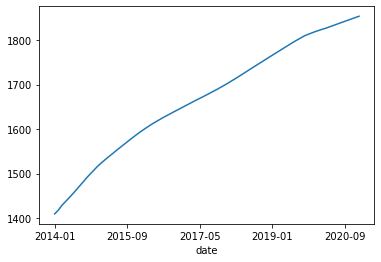

In [41]:
df.groupby('date')['rent'].agg('mean').plot()

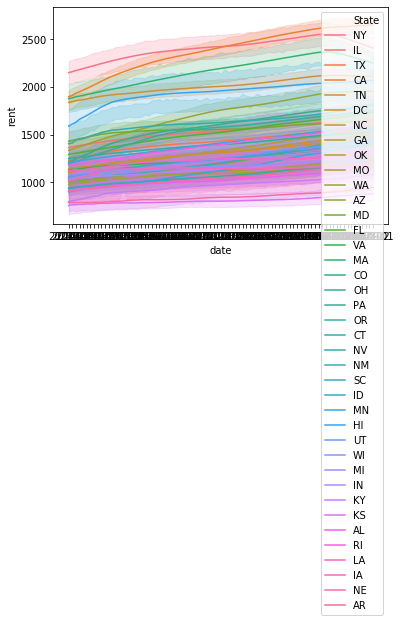

In [49]:
import seaborn as sns
sns.lineplot(data=df, x="date", y="rent", hue="State") # ugly, but seems to work